In [4]:
import pandas as pd
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv("/kaggle/input/google-2019-cluster-sample/borg_traces_data.csv")
data.shape

(405894, 34)

In [5]:
data.head()

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,resource_request,constraint,collections_events_type,user,collection_name,collection_logical_name,start_after_collection_ids,vertical_scaling,scheduler,start_time,end_time,average_usage,maximum_usage,random_sample_usage,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,"{'cpus': 0.020660400390625, 'memory': 0.014434...",[],2,fn8Ve4Tdl/FVVvwXFGIKe4+Wo4zLjUL/557qdFVYu5M=,Hzsv/gF8CPQXdqpsfovDTC1TJNyphDxPu7vaTeNxA74=,YCuhYrnORLiUh9WGL5q5tkBevfwtucSnFr2qPZh6Kes=,[],1.0,0.0,274800000000,275100000000,"{'cpus': 0.00466156005859375, 'memory': 0.0059...","{'cpus': 0.01190185546875, 'memory': 0.0059356...","{'cpus': 0.0043487548828125, 'memory': None}",0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,"{'cpus': 0.00724029541015625, 'memory': 0.0013...",[],2,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,hDGffcrF/rhQQEG8Uns/RMUK7R15DXjFnRasoKFhefI=,wcRcAMuop2OqH9EW4feH919tadFec5a11ply0hcS/C8=,[],2.0,0.0,1800713000000,1800714000000,"{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': None}",0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,"{'cpus': 0.048583984375, 'memory': 0.004165649...",[],6,/ivQBmewiFcXfGJdCUsEKx47NiRE29Tjiq3gw+zR2Cg=,kk6+maA6fvAdJ+VTU8AcpzQPTyVrx+ySt0MXRAyO8FU=,zCA2dl2PDptd82Hob906gE82JHzx0SbqA4mZurqZdmY=,[],2.0,1.0,81300000000,81600000000,"{'cpus': 0.024200439453125, 'memory': 0.002788...","{'cpus': 0.06005859375, 'memory': 0.0028457641...","{'cpus': 0.026458740234375, 'memory': None}",0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,"{'cpus': 0.0704345703125, 'memory': 0.04162597...",[],2,8qRmTJas/6XEBaA0l4Wt1+/qSLgc6p7u7JzoMSuT/M8=,fypwFjdqaQPSxCfeqVPCBAvFcnntmkRpQxwQ/vJsCxU=,uNjMQD1+DL9IgCFckx8lHOsCbyvLgKmZCmRjiyWZNhk=,[],2.0,0.0,1075500000000,1075800000000,"{'cpus': 0.047607421875, 'memory': 0.034423828...","{'cpus': 0.13330078125, 'memory': 0.03466796875}","{'cpus': 0.05084228515625, 'memory': None}",0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,"{'cpus': 0.00244903564453125, 'memory': 0.0002...",[],3,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,WS2kraTQdfsFtOIepw9SIo7ETi2ag8uwy7gt2MrpIe0=,VJ0ExwthLLpbqbyOA77EoNypzEiPYg3mECxUve0GCnY=,[],3.0,0.0,1565315000000,1565317000000,"{'cpus': 0.000270843505859375, 'memory': 7.629...","{'cpus': 0.00041484832763671875, 'memory': 7.6...","{'cpus': 0.0003414154052734375, 'memory': None}",0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [6]:
data.columns

Index(['Unnamed: 0', 'time', 'instance_events_type', 'collection_id',
       'scheduling_class', 'collection_type', 'priority',
       'alloc_collection_id', 'instance_index', 'machine_id',
       'resource_request', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name',
       'start_after_collection_ids', 'vertical_scaling', 'scheduler',
       'start_time', 'end_time', 'average_usage', 'maximum_usage',
       'random_sample_usage', 'assigned_memory', 'page_cache_memory',
       'cycles_per_instruction', 'memory_accesses_per_instruction',
       'sample_rate', 'cpu_usage_distribution', 'tail_cpu_usage_distribution',
       'cluster', 'event', 'failed'],
      dtype='object')

In [7]:
columns_to_drop = ['Unnamed: 0', 'resource_request', 'user',  'collection_name', 'collection_logical_name']
data = data.drop(columns = columns_to_drop)
data.head()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,constraint,collections_events_type,start_after_collection_ids,vertical_scaling,scheduler,start_time,end_time,average_usage,maximum_usage,random_sample_usage,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,2,94591244395,3,1,200,0,144,168846390496,[],2,[],1.0,0.0,274800000000,275100000000,"{'cpus': 0.00466156005859375, 'memory': 0.0059...","{'cpus': 0.01190185546875, 'memory': 0.0059356...","{'cpus': 0.0043487548828125, 'memory': None}",0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,[],2,[],2.0,0.0,1800713000000,1800714000000,"{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': None}",0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,195684022913,6,276227177776,2,0,103,0,376,169321752432,[],6,[],2.0,1.0,81300000000,81600000000,"{'cpus': 0.024200439453125, 'memory': 0.002788...","{'cpus': 0.06005859375, 'memory': 0.0028457641...","{'cpus': 0.026458740234375, 'memory': None}",0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,0,2,10507389885,3,0,200,0,1977,178294817221,[],2,[],2.0,0.0,1075500000000,1075800000000,"{'cpus': 0.047607421875, 'memory': 0.034423828...","{'cpus': 0.13330078125, 'memory': 0.03466796875}","{'cpus': 0.05084228515625, 'memory': None}",0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,[],3,[],3.0,0.0,1565315000000,1565317000000,"{'cpus': 0.000270843505859375, 'memory': 7.629...","{'cpus': 0.00041484832763671875, 'memory': 7.6...","{'cpus': 0.0003414154052734375, 'memory': None}",0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [82]:
def ts_analysis(timeseries, train_start= -2000, train_end = -100):
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries[train_end:].reset_index(drop = True))
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel(timeseries.name)
    plt.show()
    model = ARIMA(timeseries[train_start:train_end].reset_index(drop = True), order=(5, 2, 5)) 
    model_fit = model.fit()
    forecast = model_fit.predict(start=(abs(train_start)-abs(train_end)+1), end=(abs(train_start)-abs(train_end))+abs(train_end), typ='levels')
#     plt.figure(figsize=(12, 6))
    plt.plot(forecast.reset_index(drop = True))
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel("Predicted "+timeseries.name)
    plt.show()
    print("RMSE:", mean_squared_error(timeseries[train_end:].reset_index(drop = True), forecast.reset_index(drop = True), squared = False))

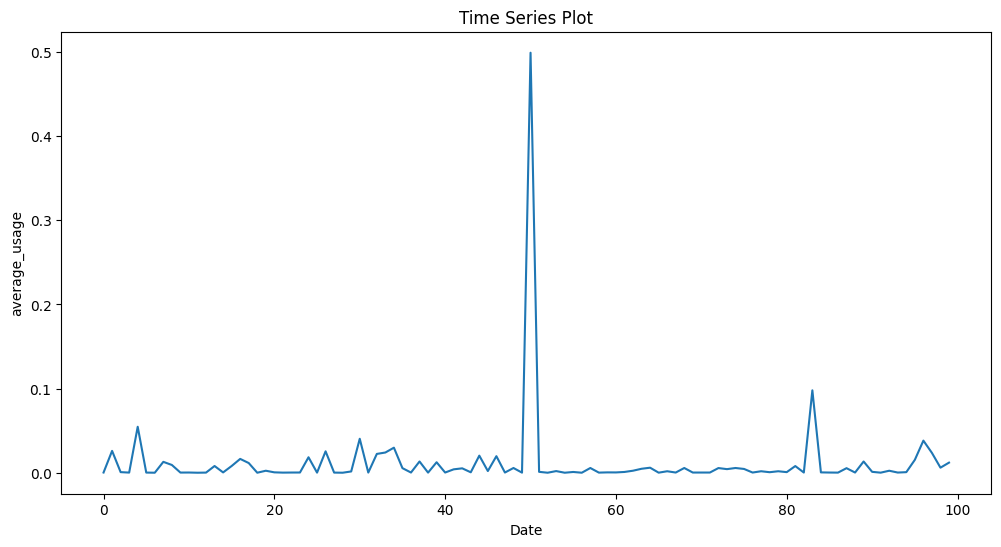

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


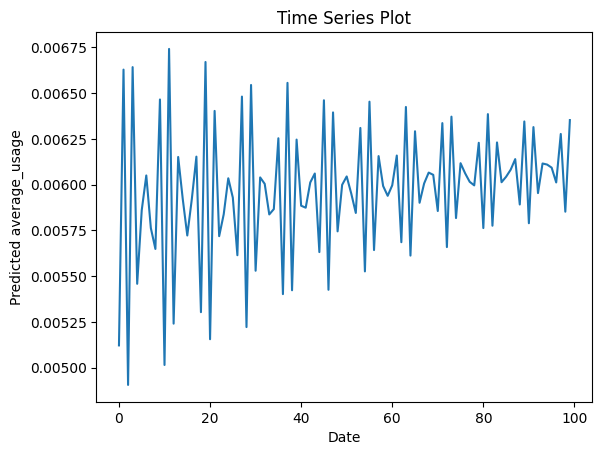

RMSE: 0.051104092083204114


In [83]:
ts_analysis(data['average_usage'].apply(lambda x: eval(x)['cpus']))

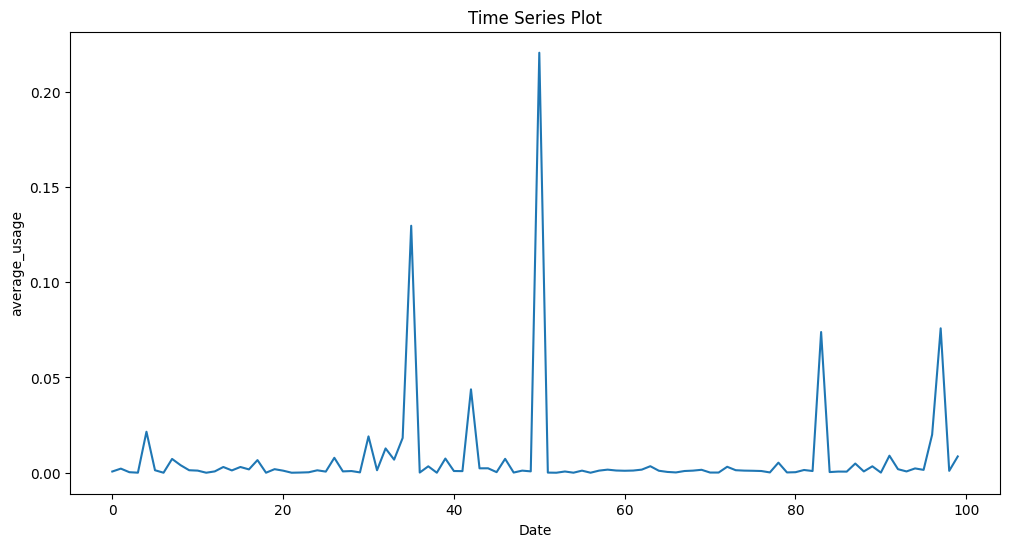

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


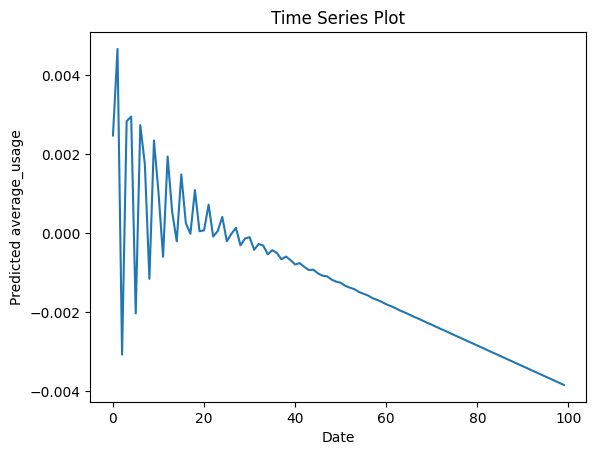

RMSE: 0.028906766994245273


In [84]:
ts_analysis(data['average_usage'].apply(lambda x: eval(x)['memory']))

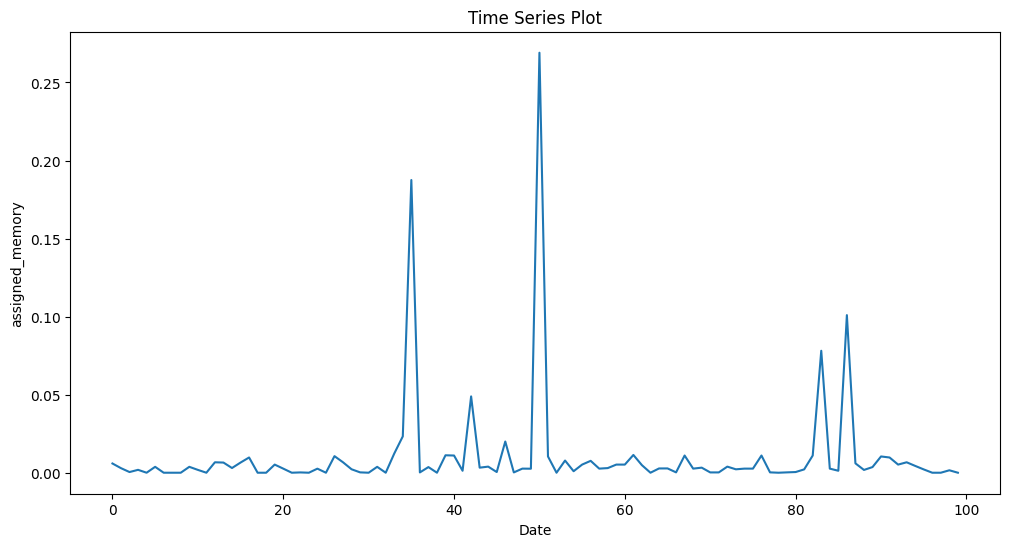

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


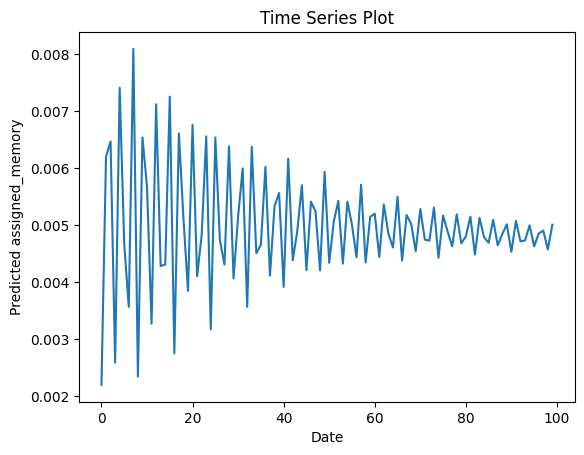

RMSE: 0.03494541062054074


In [85]:
ts_analysis(data['assigned_memory'])